In [3]:
import pandas as pd

## Recap

1. Importing data to python (change working directory or specify path)
2. Dataframes via Pandas
3. explore datasets(head, tail, info, describe)
4. rename columns
5. subsetting df
6. basic operations
7. .at() and .iat()
8. filtering dataframes (create filter and pass to df, or create condtions)
9. intro to seaborn
10. viz with seaborn
11. keyword arguments (kws using plt.scatter for sns.lmplot) -- plt is basically the grandpa of sns

## Basic Functions 

In [4]:
stats = pd.read_csv('P4-Demographic-Data.csv')

In [4]:
stats.describe()

,Birth rate,Internet users
count,195.000000,195.000000
mean,21.469928,42.076471
std,10.605467,29.030788
min,7.900000,0.900000
25%,12.120500,14.520000
50%,19.680000,41.000000
75%,29.759500,66.225000
max,49.661000,96.546800


In [5]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
Country Name      195 non-null object
Country Code      195 non-null object
Birth rate        195 non-null float64
Internet users    195 non-null float64
Income Group      195 non-null object
dtypes: float64(2), object(3)
memory usage: 7.7+ KB


In [6]:
stats.head()

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income


In [8]:
stats.tail()

,Country Name,Country Code,Birth rate,Internet users,Income Group
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income
194,Zimbabwe,ZWE,35.715,18.5,Low income


In [9]:
stats.columns

Index(['Country Name', 'Country Code', 'Birth rate', 'Internet users',
       'Income Group'],
      dtype='object')

In [6]:
stats.columns= ['CountryName', 'CountryCode', 'BirthRate', 'InternetUsers',
       'IncomeGroup']

In [15]:
stats.head()

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income


## Operations w DataFrames

In [17]:
result = stats.BirthRate * stats.InternetUsers
result.head()

0    808.2516
1    207.9927
2    878.3135
3    736.5644
4    971.8720
dtype: float64

In [18]:
#Add column

stats['myCal'] = stats.BirthRate * stats.InternetUsers
stats.head()

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup,myCal
0,Aruba,ABW,10.244,78.9,High income,808.2516
1,Afghanistan,AFG,35.253,5.9,Low income,207.9927
2,Angola,AGO,45.985,19.1,Upper middle income,878.3135
3,Albania,ALB,12.877,57.2,Upper middle income,736.5644
4,United Arab Emirates,ARE,11.044,88.0,High income,971.8720


In [23]:
#removing column

stats = stats.drop('myCal', 1)

In [24]:
stats.head()

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income


## Filtering Data Frames

In [25]:
stats.InternetUsers < 2

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11      True
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
165    False
166    False
167    False
168    False
169    False
170    False
171    False
172     True
173    False
174    False
175    False
176    False
177    False
178    False
179    False
180    False
181    False
182    False
183    False
184    False
185    False
186    False
187    False
188    False
189    False
190    False
191    False
192    False
193    False
194    False
Name: InternetUsers, Length: 195, dtype: bool

In [26]:
Filter = stats.InternetUsers < 2

In [28]:
Filter.head()

0    False
1    False
2    False
3    False
4    False
Name: InternetUsers, dtype: bool

In [29]:
stats[Filter]

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
11,Burundi,BDI,44.151,1.3,Low income
52,Eritrea,ERI,34.800,0.9,Low income
55,Ethiopia,ETH,32.925,1.9,Low income
64,Guinea,GIN,37.337,1.6,Low income
117,Myanmar,MMR,18.119,1.6,Lower middle income
127,Niger,NER,49.661,1.7,Low income
154,Sierra Leone,SLE,36.729,1.7,Low income
156,Somalia,SOM,43.891,1.5,Low income
172,Timor-Leste,TLS,35.755,1.1,Lower middle income


In [31]:
stats[stats.BirthRate > 40]

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
2,Angola,AGO,45.985,19.1,Upper middle income
11,Burundi,BDI,44.151,1.3,Low income
14,Burkina Faso,BFA,40.551,9.1,Low income
65,"Gambia, The",GMB,42.525,14.0,Low income
115,Mali,MLI,44.138,3.5,Low income
127,Niger,NER,49.661,1.7,Low income
128,Nigeria,NGA,40.045,38.0,Lower middle income
156,Somalia,SOM,43.891,1.5,Low income
167,Chad,TCD,45.745,2.3,Low income
178,Uganda,UGA,43.474,16.2,Low income


In [35]:
stats[(stats.BirthRate > 40) & (stats.InternetUsers < 2)] 
# cant use 'and' and need to use brackets otherwise it compares individually and gives type error

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
11,Burundi,BDI,44.151,1.3,Low income
127,Niger,NER,49.661,1.7,Low income
156,Somalia,SOM,43.891,1.5,Low income


In [37]:
stats[stats.IncomeGroup == 'High income']

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
0,Aruba,ABW,10.244,78.90000,High income
4,United Arab Emirates,ARE,11.044,88.00000,High income
5,Argentina,ARG,17.716,59.90000,High income
7,Antigua and Barbuda,ATG,16.447,63.40000,High income
8,Australia,AUS,13.200,83.00000,High income
9,Austria,AUT,9.400,80.61880,High income
12,Belgium,BEL,11.200,82.17020,High income
17,Bahrain,BHR,15.040,90.00004,High income
18,"Bahamas, The",BHS,15.339,72.00000,High income
22,Bermuda,BMU,10.400,95.30000,High income


In [39]:
stats.IncomeGroup.unique()

array(['High income', 'Low income', 'Upper middle income',
       'Lower middle income'], dtype=object)

In [42]:
stats[stats.CountryName == 'Malta']

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
116,Malta,MLT,9.5,68.9138,High income


## Accessing individual elements

In [43]:
stats[2,2]          #error. why?

KeyError: (2, 2)

In [44]:
stats.head()

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income


In [45]:
#.at for labels, even integers are treated as labels
#.iat for integer location

In [46]:
stats.iat[3,4]

'Upper middle income'

In [47]:
stats.iat[0,1]

'ABW'

In [49]:
stats.at[2, 'CountryCode']

'AGO'

In [52]:
sub10 =stats[::10]
sub10.head()

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
0,Aruba,ABW,10.244,78.90,High income
10,Azerbaijan,AZE,18.300,58.70,Upper middle income
20,Belarus,BLR,12.500,54.17,Upper middle income
30,Canada,CAN,10.900,85.80,High income
40,Costa Rica,CRI,15.022,45.96,Upper middle income


In [53]:
sub10.iat[10,0]

'Libya'

In [54]:
sub10.at[10,'CountryName']

'Azerbaijan'

## Intro to seaborn

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
plt.rcParams['figure.figsize']=8,4
warnings.filterwarnings('ignore')

In [7]:
stats.head()

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income


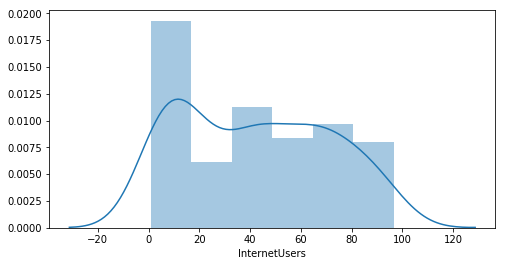

In [13]:
#Distribution 

vis1 = sns.distplot(stats["InternetUsers"])

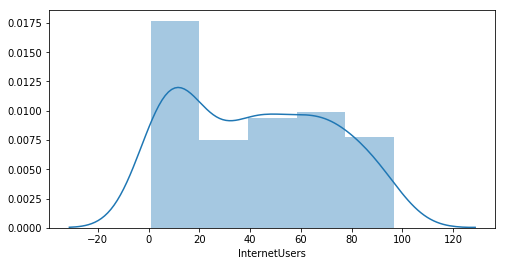

In [16]:

vis1 = sns.distplot(stats["InternetUsers"],bins=5)

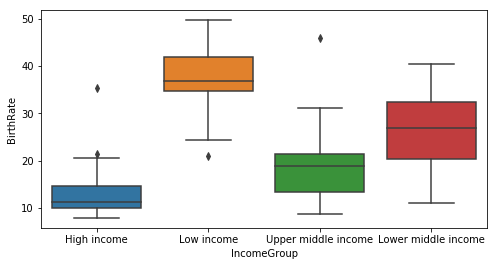

In [19]:
#Box plots

vis2 = sns.boxplot(data=stats, x= "IncomeGroup", y="BirthRate")

In [ ]:
#seaborn gallery - google search

### Visualisation with Seaborn

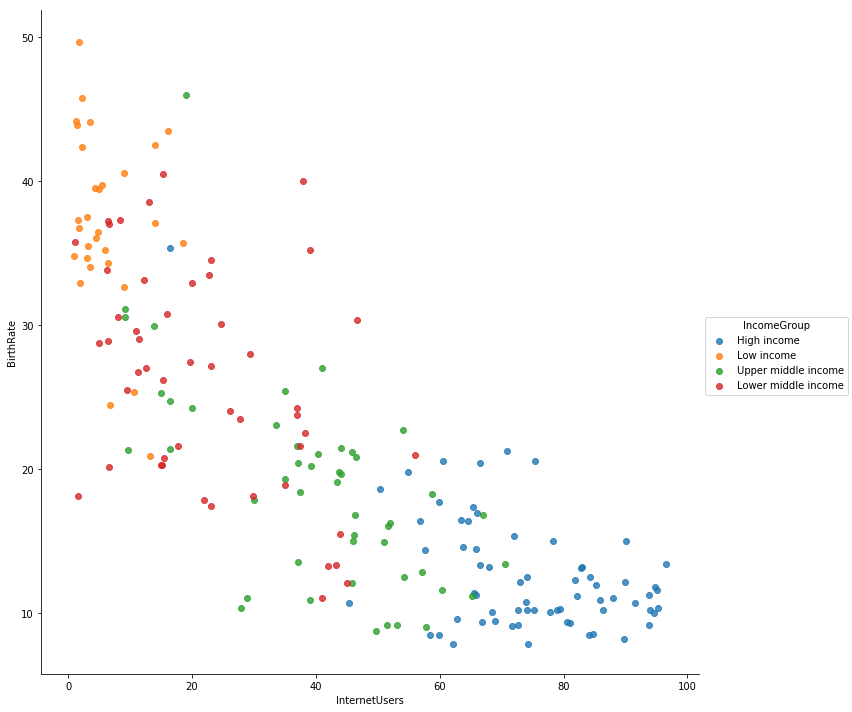

In [30]:
#linear model, size hue and aspect
vis3 = sns.lmplot (data=stats, x="InternetUsers", y="BirthRate", fit_reg=False, 
                  hue="IncomeGroup", size=10)

### Keyword arguments in Python

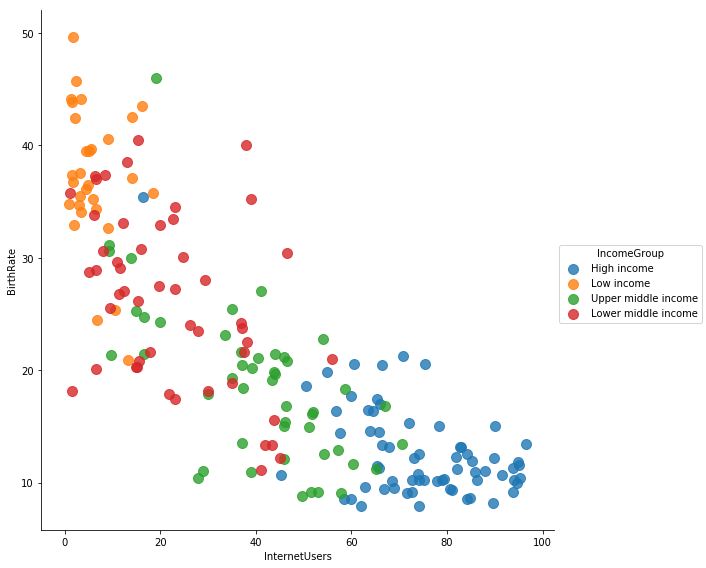

In [32]:
# conceptual principle in python (Advanced)

#marker size - scatter_kws uses plt.scatter s parameter (key value pairs)
vis3 = sns.lmplot (data=stats, x="InternetUsers", y="BirthRate", fit_reg=False, 
                  hue="IncomeGroup", size=8, scatter_kws={"s":100} )